# Học phần : Phân tích dữ liệu cho tài chính (DAT709_232_1_D01)

# Đề tài 4 : Xây dựng mô hình phân tích cơ hội đầu tư
## (Investment Opportunity Analysis - EDA)

# Nhóm 12

 || Tên | MSSV |Tổng % đóng góp |
 |:----------:|:--------------:|:----------:|:----------------:|
 |1| **Triệu Tuấn Vĩ**  |  030237210212  | 20%  |
 |2| **Lê Nhật Hoàn Vũ**|   030237210214  |  20% |
 |3| **Ngô Lê Trúc Vy** |   030237210217   |  20%  |
 |4| **Nguyễn Thanh Vy** |  030237210219   |  20%  |
 |5| **Nguyễn Lê Hải Yên** |   030237210222   |  20%  |
 || **** |     |  100%  |

# Tải dữ liệu và làm sạch

In [1]:
# Câu lệnh cài đặt các thư viện nếu Jupyter Notebook không có sẵn
# !pip install numpy pandas matplotlib seaborn warnings

In [2]:
# Cài đặt các thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cài đặt thư viện để tắt thông báo cảnh báo (warnings) khi thực thi mã lệnh
import warnings
warnings.filterwarnings('ignore')

##  Tải và thống kê dữ liệu

In [4]:
# Đặt thư mục làm việc đến vị trí cần thiết
import os
print(os.listdir('D:/DE TAI 4'))

['companies.txt', 'mapping.csv', 'rounds2.csv']


In [5]:
# Đọc file dữ liệu
# pd.read_csv : phương thức đọc file văn bản
# encoding ISO-8859-1 là kiểu mã hóa sử dụng trong file văn bản để tránh lỗi mã hóa pandas
# sử dụng sep là '\t' cho tệp txt
companies = pd.DataFrame(pd.read_csv('D:/DE TAI 4/companies.txt', sep='\t', encoding = 'ISO-8859-1'))

In [6]:
# Tổng quan về dữ liệu trong tệp companies
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
# Xem thống kê dataframe companies
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/-Fame,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


Ta có :
+ cột permalink có tất cả 66368 các hàng có giá trị duy nhất
+ 27296 loại công ty nhận đầu tư
+ 137 quốc gia và trong đó có 311 tiểu bang nhận đầu tư

In [8]:
# Đọc file csv rounds2 thành 1 dataframe
rounds2 = pd.DataFrame(pd.read_csv( 'D:/DE TAI 4/rounds2.csv', encoding = 'ISO-8859-1'))

In [9]:
# Tổng quan về dữ liệu trong tệp rounds2
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [10]:
# Kiểm tra shape của DataFrames
print('Companies File: ', companies.shape)
print('Rounds File: ', rounds2.shape)

Companies File:  (66368, 10)
Rounds File:  (114949, 6)


In [11]:
# Các quan sát đầu tiên của tập dữ liệu companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [12]:
# Các quan sát đầu tiên của tập dữ liệu rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


## Làm sạch dữ liệu

Cột permalink trong dataframe companies phải là khóa duy nhất của bảng, có 66368 tên công ty duy nhất (links hoặc permalinks). Ngoài ra, 66368 công ty này phải có trong file rounds2.

Trước tiên, xác nhận rằng 66368 permalinks (là đường dẫn URL của trang web của các công ty) là duy nhất trong cột\
    a.  có trong companies DataFrame nhưng không có trong rounds2 DataFrame.\
    b.  có trong rounds2 DataFrame nhưng không có trong companies DataFrame.

In [13]:
# Chuyển đổi tất cả các permalink thành chữ thường (lowercase)
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [14]:
# Xác định số lượng permalinks duy nhất trong tập companies
len(companies.permalink.unique())

66368

Do đó, có 66368 công ty duy nhất trong bảng và permalink là khóa chính duy nhất. Mỗi hàng đại diện cho một công ty duy nhất.

Bây giờ kiểm tra xem tất cả 66368 công ty này có xuất hiện trong tệp rounds2 hay không và liệu có thêm một số nào không


In [15]:
# Xác định số lượng permalinks duy nhất trong tập companies rounds2
len(rounds2.company_permalink.unique())

66370

Dường như có thêm 2 permalinks trong tệp rounds2 không có trong tệp companies.

Chúng ta hãy xem các permalink của companies nằm trong tệp 'rounds2' nhưng không có trong 'companies'.

In [16]:
# Xác định giá trị thuộc cột permalink của df companies không nằm trong danh sách company_permalink của df rounds2
companies.loc[~companies['permalink'].isin(rounds2['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
16827,/organization/e-cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
18197,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
26139,/organization/huizuche-com-æ ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
58344,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


In [17]:
# Xác định giá trị thuộc cột company_permalink của df rounds2 không nằm trong permalink của df companies
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


Các ký tự lạ trong companies xuất hiện khi nhập tệp dữ liệu. Để xác nhận xem các ký tự này có thực sự xuất hiện trong dữ liệu đã cho hay là python có đưa chúng vào khi nhập vào pandas hay không, ta xem tệp CSV gốc trong Excel.

Vì vậy, rất có thể đây là sự cố về dữ liệu khi đọc tệp dữ liệu vào python. Cụ thể, điều này rất có thể xảy ra do mã hóa. (Do đó, companies df cũng chứa các ký tự đặc biệt. Ta xử lý dữ liệu)

In [18]:
# Loại bỏ encoding trong companies
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['name'] = companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')

# Loại bỏ encoding trong rounds2
rounds2['company_permalink'] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

Bây giờ chúng ta hãy xem xét các công ty có mặt trong df companies nhưng không có trong df rounds2.

In [19]:
# Các công ty hiện diện trong bộ dữ liệu 'companies' nhưng không có trong bộ dữ liệu 'rounds2'
companies.loc[~companies['permalink'].isin(rounds2['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [20]:
# Kiểm tra lại các giá trị duy nhất
len(rounds2.company_permalink.unique())

66368

Giờ thì điều đó đã hợp lý - có 66368 công ty duy nhất trong cả 2 dataframe rounds2 và companies

Có thể vấn đề mã hóa tương tự cũng xuất hiện trong tệp companies.

In [21]:
# Xác định 66368 giá trị duy nhất trong cả 2 dataframe companies và rounds2
# xác định xác trị duy nhất
print(len(companies.permalink.unique()))
print(len(rounds2.company_permalink.unique()))

# Xác định giá trị có trong companies nhưng không có trong rounds2
print(len(rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']), :]))
print(len(companies[~companies['permalink'].isin(rounds2['company_permalink'])]))

66368
66368
0
0


## Xử lý dữ liệu bị thiếu

In [22]:
# Kiểm tra giá trị bị thiếu trong dataframe companies
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [23]:
# Kiểm tra giá trị bị thiếu trong dataframe rounds2
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

Vì không có giá trị nào bị thiếu trong các cột permalink hoặc company_permalink, hãy hợp nhất cả hai rồi làm việc trên master dataframe.

In [24]:
# Nối 2 dataframe thành master dataframe dựa trên permalink và company_link
master = pd.merge(companies, rounds2, how='inner', left_on='permalink', right_on='company_permalink')
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Vì các cột company_permalink và permalink giống nhau nên hãy xóa một trong số chúng.

In [25]:
# Loại bỏ các cột dư thừa
master =  master.drop(['company_permalink'], axis=1)

In [26]:
# Tính tỉ lệ các giá trị bị thiếu
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Với khoảng 73% giá trị bị thiếu, cột funding_round_code là vô dụng. Ngoài ra, đối với các mục tiêu kinh doanh được đưa ra, các cột homepage_url, founded_at, state_code, region và city không cần phải được sử dụng.\
Hãy xóa các cột này.

In [27]:
# Loại bỏ các cột dư thừa
master = master.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
master.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [28]:
# Tính tỉ lệ các giá trị bị thiếu lần nữa
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Do cột raise_amount_usd là một cột quan trọng, vì đó là con số chúng ta muốn phân tích (so sánh, giá trị trung bình, tổng, v.v.). nên cần phải được xử lý cẩn thận.

Ngoài ra, cột country_code sẽ được sử dụng để phân tích theo quốc gia và category_list sẽ được sử dụng để hợp nhất dataframe với các danh mục chính.

Trước tiên ta có thể xử lý các giá trị bị thiếu trong raise_amount_usd

In [29]:
# Mô tả các thông số thống kê của cột raised_amount_usd của dataframe master
master['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

Giá trị trung bình khoảng 10 triệu USD, trong khi giá trị trung vị chỉ khoảng 1,68 triệu USD. Giá trị tối thiểu và tối đa cũng cách xa nhau.

Nhìn chung, vì số tiền tài trợ có sự chênh lệch rất lớn nên sẽ không phù hợp nếu quy nó bằng một số liệu như trung vị hoặc trung bình. Ngoài ra, vì chúng ta có số lượng quan sát khá lớn nên sẽ khôn ngoan hơn nếu chỉ bỏ bớt các hàng.

Do đó, hãy loại bỏ các hàng có NaN trong raise_amount_usd.

In [30]:
# Loại bỏ các giá trị NaNs trong raised_amount_usd
master = master[~np.isnan(master['raised_amount_usd'])]
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [31]:
# Chuyển đổi cột country_code thành loại 'category' để xem sự phân bố của các giá trị cho các biến phân loại
country_codes = master['country_code'].astype('category')

In [32]:
# Hiển thị 10 quốc gia có số lần xuất hiện nhiều nhất
country_codes.value_counts().head(10)

country_code
USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
Name: count, dtype: int64

In [33]:
# Hiển thị 10 quốc gia có số lần xuất hiện ít nhất
country_codes.value_counts().tail(10)

country_code
HND    1
IRN    1
MKD    1
TGO    1
PSE    1
SYC    1
KNA    1
SEN    1
LAO    1
PRY    1
Name: count, dtype: int64

Cho đến nay, số lượng đầu tư nhiều nhất đã xảy ra ở nước Mỹ. Chúng ta cũng có thể thấy các phân số.

In [34]:
# Tính tỉ lệ các quốc gia xuất hiện
100*(master['country_code'].value_counts()/len(master.index))

country_code
USA    65.342937
GBR     5.285439
CAN     2.754873
CHN     2.029297
IND     1.736539
         ...    
HND     0.001053
GGY     0.001053
TGO     0.001053
MNE     0.001053
SEN     0.001053
Name: count, Length: 134, dtype: float64

Bây giờ, chúng ta có thể xóa các hàng bị thiếu country_code (khoảng 6% hàng) hoặc chúng ta có thể gán chúng cho Mỹ. Vì 6% khá nhỏ và chúng ta có một lượng dữ liệu kha khá, có thể tốt hơn là chỉ xóa các hàng.

In [35]:
# Loại bỏ dòng có giá trị bị thiếu trong country_codes
master = master[~pd.isnull(master['country_code'])]

# Tính tỉ lệ các giá trị bị thiếu
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Lưu ý rằng tỷ lệ giá trị bị thiếu trong dataframe  còn lại hiện cũng đã giảm - chỉ 0,65% trong category_list.Do đó, chúng ta hãy loại bỏ những thứ đó.

In [36]:
# Loại bỏ dòng có giá trị bị thiếu trong category_list values
master = master[~pd.isnull(master['category_list'])]

# Tính tỉ lệ các giá trị bị thiếu
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [37]:
# Xem thông tin dataframe master
master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88529 non-null  object 
 1   name                     88528 non-null  object 
 2   category_list            88529 non-null  object 
 3   status                   88529 non-null  object 
 4   country_code             88529 non-null  object 
 5   funding_round_permalink  88529 non-null  object 
 6   funding_round_type       88529 non-null  object 
 7   funded_at                88529 non-null  object 
 8   raised_amount_usd        88529 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


# Phân tích dữ liệu
**Xác định các lĩnh vực, quốc gia tốt nhất và loại hình đầu tư phù hợp để thực hiện đầu tư. Chiến lược tổng thể là đầu tư vào nơi những người khác đang đầu tư, ngụ ý rằng các lĩnh vực và quốc gia 'tốt nhất' là những nơi 'hầu hết các nhà đầu tư đang đầu tư'.**

## Phân tích loại hình đầu tư

Các loại hình đầu tư như seed, venture, angel, etc.phụ thuộc vào loại hình công ty (khởi nghiệp, công ty, v.v.), giai đoạn của nó (khởi nghiệp giai đoạn đầu, khởi nghiệp được tài trợ, v.v.), số tiền tài trợ ( triệu USD đến một tỷ USD), v.v. Ví dụ seed, angel và venture là ba giai đoạn phổ biến của nguồn vốn khởi nghiệp.

Đầu tư seed/angel đề cập đến các công ty khởi nghiệp ở giai đoạn đầu trong khi nguồn đầu tư venture xảy ra sau/các giai đoạn seed hoặc angel và liên quan đến số tiền đầu tư tương đối cao hơn.
Các khoản đầu tư thuộc loại cổ phần tư nhân (Private equity) được liên kết với các công ty lớn hơn và liên quan đến các khoản đầu tư cao hơn so với loại hình liên doanh (venture) .Các công ty khởi nghiệp đã phát triển về quy mô cũng có thể nhận được nguồn vốn cổ phần tư nhân. Điều này có nghĩa là nếu một công ty đã đạt đến giai đoạn đầu tư venture thì nó đã vượt qua giai đoạn angel hoặc seed.

In [38]:
# Xem các giá trị duy nhất từ funding_round_type
print(master.funding_round_type.unique())

# Lấy các giá trị duy nhất và đếm chúng
unique_funding_round_types = master.funding_round_type.unique()
unique_count = len(unique_funding_round_types)

# In số lượng giá trị duy nhất
print(unique_count)

['venture' 'seed' 'undisclosed' 'convertible_note' 'private_equity'
 'debt_financing' 'angel' 'grant' 'equity_crowdfunding' 'post_ipo_equity'
 'post_ipo_debt' 'product_crowdfunding' 'secondary_market'
 'non_equity_assistance']
14


Kết quả cho thấy dữ liệu bao gồm các loại hình đầu tư đa dạng. Thể hiện sự phong phú của cơ hội đầu tư trong dữ liệu, từ các startup mới đến các doanh nghiệp lớn và có thị phần ổn định. Điều này cung cấp một cơ sở vững chắc cho việc phân tích và lựa chọn loại hình đầu tư phù hợp với mục tiêu đầu tư và chiến lược của nhà đầu tư.

Tiếp theo ta sẽ liệt kê tất cả các loại hình đầu tư trong tập dữ liệu bằng cách thống kê số lượng giao dịch cho mỗi loại hình. Qua thống kê ta có thể thấy được mức độ phổ biến của từng loại hình đầu tư

In [39]:
# Đếm các thành phần trong funding_round_type
print(master.funding_round_type.value_counts())

funding_round_type
venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: count, dtype: int64


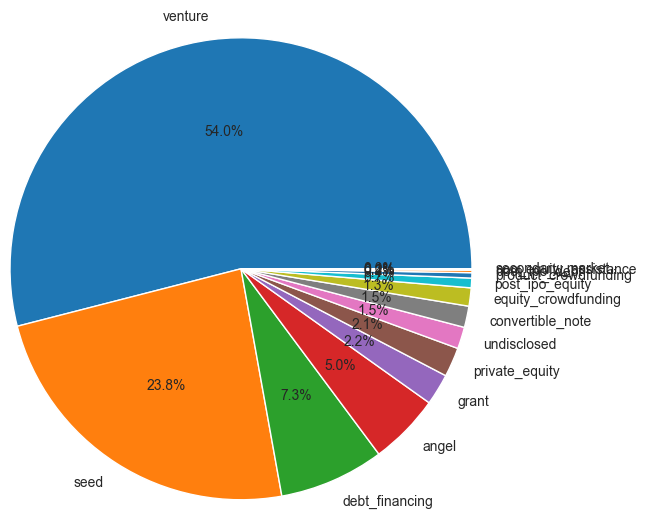

In [40]:
# Vẽ biểu đồ tròn thống kê tỷ lệ số lượng giao dịch cho mỗi loại hình
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
round_types = master.funding_round_type.value_counts()
plt.pie(round_types.values, labels=round_types.index, autopct='%.1f%%',radius=1.5, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.show()

(1) **Venture và Seed đang chiếm vị trí dẫn đầu về số lượng giao dịch, vượt xa so với các loại hình đầu tư khác. Sự chênh lệch lớn trong số lượng giao dịch giữa Venture, Seed và các loại hình đầu tư khác cho thấy rằng Venture và Seed là những lựa chọn phổ biến và được ưa chuộng từ các nhà đầu tư trong dữ liệu này.**

Bây giờ, chúng ta phải tính giá trị đại diện của số tiền tài trợ cho từng loại hình đầu tư. Chúng ta có thể chọn giá trị trung bình hoặc trung vị - hãy xem phân phối của raise_amount_usd để hiểu về phân phối dữ liệu.

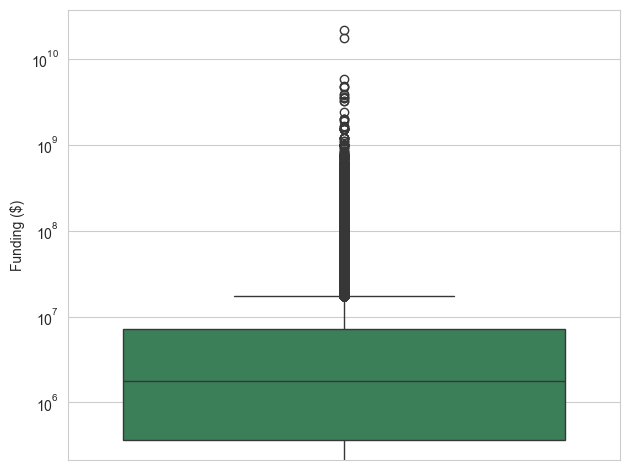

In [41]:
# Vẽ boxplot để xem phân phối của raised_amount_usd
plt1 = sns.boxplot(y=master['raised_amount_usd'], color='seagreen')
plt.yscale('log')
plt1.set(ylabel = 'Funding ($)')
plt.tight_layout()
plt.show()

In [42]:
# Chuyển đổi số tiền gọi vốn đã huy động sang triệu USD
master['raised_amount_usd'] = round(master['raised_amount_usd']/1000000,2)

In [43]:
master.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.70
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.00
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.04
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.04


In [44]:
# Xem thống kê raised_amount_usd trong data frame master (summary metrics)
master['raised_amount_usd'].describe()

count    88529.000000
mean        10.473819
std        111.811821
min          0.000000
25%          0.370000
50%          1.800000
75%          7.100000
max      21271.940000
Name: raised_amount_usd, dtype: float64

Từ dữ liệu ta thấy rằng 'raised_amount_usd' có sự phân tán lớn trong dữ liệu. Phần lớn các giao dịch tập trung ở mức giá trị thấp. Tuy nhiên, cũng có một số lượng nhỏ các giao dịch có giá trị tài trợ rất lớn, với giá trị lớn nhất lên đến 21271.94 triệu USD. Điều này cho thấy sự không đồng đều trong phân phối giá trị của các giao dịch đầu tư.

Lưu ý rằng có sự khác biệt đáng kể giữa giá trị trung bình và giá trị trung vị - 10,5 triệu USD và 1,8 triệu USD. Chúng ta cũng hãy so sánh số liệu thống kê tóm tắt giữa các category.

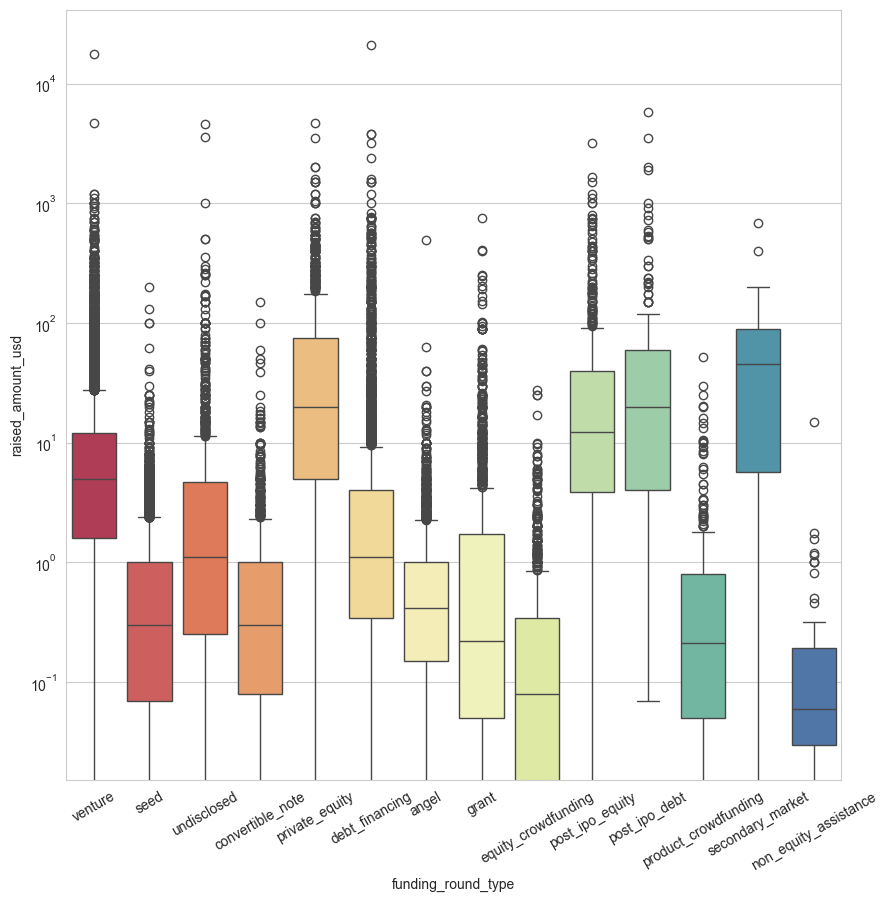

In [45]:
# So sánh các số liệu tóm tắt giữa các nhóm
plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master , palette = 'Spectral' )
plt.yscale('log')
plt.xticks(rotation = 30)
plt.show()

In [46]:
# So sánh giá trị trung bình và trung vị giữa các nhóm
master.pivot_table(values='raised_amount_usd',columns='funding_round_type',aggfunc=[np.median])

median                                                      \
funding_round_type  angel convertible_note debt_financing equity_crowdfunding   
raised_amount_usd   0.415              0.3            1.1                0.08   

                                                                              \
funding_round_type grant non_equity_assistance post_ipo_debt post_ipo_equity   
raised_amount_usd   0.22                  0.06          19.9          12.265   

                                                                              \
funding_round_type private_equity product_crowdfunding secondary_market seed   
raised_amount_usd            20.0                 0.21            45.85  0.3   

                                        
funding_round_type undisclosed venture  
raised_amount_usd          1.1     5.0

In [47]:
# So sánh giá trị trung bình và trung vị giữa các nhóm
master.pivot_table(values='raised_amount_usd',columns='funding_round_type',aggfunc=[np.mean])

mean                                  \
funding_round_type    angel convertible_note debt_financing   
raised_amount_usd   0.97148         1.337091      17.167621   

                                                                        \
funding_round_type equity_crowdfunding     grant non_equity_assistance   
raised_amount_usd             0.509761  4.512604              0.480667   

                                                                 \
funding_round_type post_ipo_debt post_ipo_equity private_equity   
raised_amount_usd     169.451788        66.07709      73.938478   

                                                                    \
funding_round_type product_crowdfunding secondary_market      seed   
raised_amount_usd              1.353333        84.438214  0.747736   

                                           
funding_round_type undisclosed    venture  
raised_amount_usd    15.891628  11.724214

Lưu ý rằng có sự khác biệt lớn giữa giá trị trung bình và giá trị trung bình cho tất cả các loại.
Vì vậy, việc lựa chọn thống kê tóm tắt sẽ ảnh hưởng mạnh mẽ đến quyết định (về loại hình đầu tư). Hãy chọn số trung vị, vì có khá nhiều giá trị cực trị kéo giá trị trung bình lên về phía chúng - nhưng chúng không phải là giá trị 'tiêu biểu' nhất.

In [48]:
# So sánh trung vị từ giá trị đầu tư giữa các loại hình đầu tư
master.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
secondary_market         45.850
private_equity           20.000
post_ipo_debt            19.900
post_ipo_equity          12.265
venture                   5.000
debt_financing            1.100
undisclosed               1.100
angel                     0.415
convertible_note          0.300
seed                      0.300
grant                     0.220
product_crowdfunding      0.210
equity_crowdfunding       0.080
non_equity_assistance     0.060
Name: raised_amount_usd, dtype: float64

- Loại hình đầu tư Private Equity có sự chênh lệch lớn hơn so với các loại hình đầu tư khác.Do thường thực hiện ở giai đoạn sau khi doanh nghiệp đã có sự phát triển và thị phần ổn định, ta có thể thấy được sự quan tâm của các nhà đầu tư là các doanh nghiệp đã ổn định và có tiềm năng tăng trưởng cao
- Venture tuy có số tiền đầu tư ít hơn so với Private Equity nhưng vẫn chiếm vị trí quan trọng trong bảng xếp hạng loại hình đầu tư. Điều này cho thấy các nhà đầu tư cũng có quan tâm đến các doanh nghiệp mới nổi và trên đà phát triển nhanh
- Angel và Seed tuy số tiền đầu tư ít hơn hẳn so với 2 loại hình trước nhưng mà vẫn cân nhắc đầu tư vào các doanh nghiệp ở giai đoạn đầu sự phát triển, tuy tiềm năng rủi ro khá cao.
- Các loại hình đầu tư khác không đáng kể so với Private Equity, Venture, Angel và Seed do có ít số lượng giao dịch.

(2) **Từ đây ta kết luận được:
Số tiền đầu tư trung bình cho loại 'private_equity' là khoảng 20 triệu USD, vượt quá phạm vi chênh lệch giữa giá trị trung bình và trung vị (10,5 - 1,8 triệu USD) và phạm vi 5-15 triệu của Spark Funds. Số tiền đầu tư trung bình của các loại debt_financing, angel, seed, grant... đều nằm ngoài phạm vi trên. Vì vậy mức trung bình của loại hình 'Venture' là khoảng 5 triệu USD, thích hợp nhất trong các loại hình đầu tư.**

**Từ (1) và (2) ta có thể đưa ra kết luận đầu tư theo loại hình 'Venture' sẽ phù hợp nhất**

## Phân tích quốc gia

In [49]:
# Lọc bộ dữ liệu theo loại hình đầu tư phù hợp nhất (Venture)
master_frame = master[master.funding_round_type=='venture']

# Nhóm theo mã quốc gia và so sánh tổng số tiền vốn huy động
country_wise_total=master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)
country_wise_total

country_code
USA    420067.65
CHN     39338.79
GBR     20072.77
IND     14261.56
CAN      9482.20
FRA      7226.81
ISR      6854.34
DEU      6307.00
JPN      3167.67
SWE      3145.88
Name: raised_amount_usd, dtype: float64

Trong số 10 quốc gia dẫn đầu, Mỹ, Trung Quốc và Anh là ba quốc gia đứng đầu với số tiền đầu tư nhiều nhất. Hãy lọc dataframe để nó chỉ chứa 3 quốc gia hàng đầu.




In [50]:
# Lọc top 3 quốc gia
master_frame = master_frame[(master_frame.country_code=='USA') | 
                            (master_frame.country_code=='CHN') | 
                            (master_frame.country_code=='GBR')]
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0


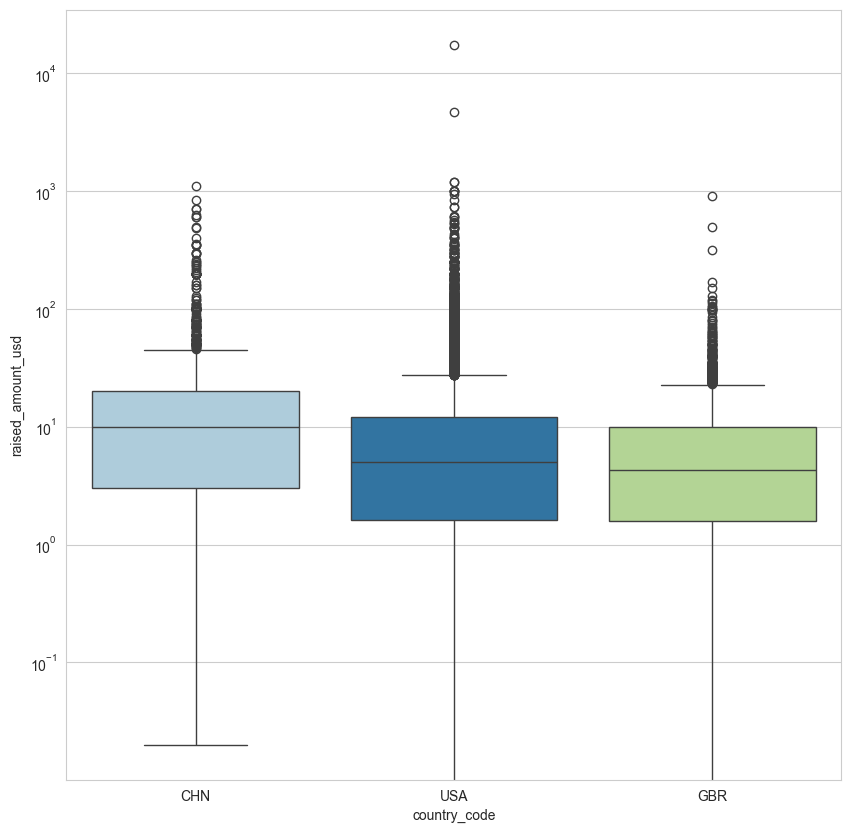

In [51]:
# Tạo biểu đồ boxplot để thấy phân bố của số tiền tài trợ từ các quốc gia
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=master_frame, palette= 'Paired')
plt.yscale('log')
plt.show()

Từ biểu đồ ta có thể thấy mỗi quốc gia có một màu tương ứng, biểu thi phạm vi giá trị đầu tư.
- Mỹ là quốc gia nhận được số tiền đầu tư cao nhất trong quá khứ, hộp màu xanh đậm lớn có nhiều điểm ngoại lai điều này cho thấy quốc gia này có sự biến động lớn về số tiền đầu tư.
- Trung Quốc có vùng màu xanh nhạt và ngắn hơn so với Mỹ, ít điểm ngoại lai hơn, cho thấy ở đây ít biến động hơn về số tiền đầu tư.
- Anh Quốc tuy đứng thứ 3 về số lượng tiền đầu tư vào, cũng như là phạm vi đầu tư nhỏ hơn nhưng điều này cho thấy ở đây có sự ổn định và nhất quán trong hoạt động đầu tư. Không như Mỹ và Trung Quốc vì 2 quốc gia này có sự biến động lớn trong số tiền đầu tư, cho thấy có sự không ổn định và rủi ro trong việc đầu tư tại đây.

**Vậy quốc gia có số lượng và số tiền đầu tư cao nhất trong quá khứ là Mỹ, là quốc gia phù hợp để đầu tư nhất dựa trên chiến lược kinh doanh được đưa ra.**

## Phân tích lĩnh vực đầu tư

Khi phân tích ngành, ta đề cập đến lĩnh vực chính (được đặt tên là main_sector) được liệt kê trong tệp mapping. Nhằm đơn giản hóa việc phân tích , ta nhóm nhiều danh sách danh mục (được đặt tên là 'category_list') trong tệp mapping. Ví dụ: trong tệp mapping, danh sách danh mục chẳng hạn như ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. được ánh xạ tới lĩnh vực chính 'Manufacturing'.

Ngoài ra, đối với một số công ty, danh sách danh mục ( category list ) là danh sách gồm nhiều ngành phụ được phân tách bằng dấu gạch ngang (thanh dọc |). Ví dụ: Application Platforms|Real Time|Social Network Media

Quy tắc kinh doanh được đặt ra là : chuỗi đầu tiên trước thanh dọc sẽ là lĩnh vực chính. Trong ví dụ trên, ‘Application Platforms’ sẽ là lĩnh vực chính.

Trích xuất khu vực chính của từng danh sách danh mục từ cột category_list

Sử dụng tệp 'mapping.csv' để ánh xạ từng lĩnh vực chính vào một lĩnh vực chính (Lưu ý rằng ‘Other’ cũng được coi là một lĩnh vực chính)

### Xử lí tệp mapping.csv và gộp vào master dataframe

In [52]:
# Trích xuất category_list từ master_frame
master_frame['category_list'] = master_frame['category_list'].str.split('|').str.get(0)
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9
22,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0


In [53]:
# Đọc file csv mapping thành 1 dataframe
mapping = pd.DataFrame(pd.read_csv( 'D:/DE TAI 4/mapping.csv', sep=','))

# Các quan sát đầu tiên của tập dữ liệu mapping
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


Trước tiên, hãy loại bỏ các giá trị còn thiếu vì ta không thể hợp nhất các hàng đó.

In [54]:
# Các giá trị bị thiếu trong file mapping
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [55]:
# Loại bỏ hàng có giá trị bị thiếu
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [56]:
# Chuyển đổi các cột chung thành dạng chữ thường
mapping['category_list'] = mapping['category_list'].str.lower()
master_frame['category_list'] = master_frame['category_list'].str.lower()

Để có thể hợp nhất tất cả các giá trị category với cột Category_list của tệp mapping, tất cả các giá trị trong cột Category_list phải có trong cột Category_list của tệp mapping.

In [57]:
# Các giá trị trong cột category_list của bảng master không xuất hiện trong cột category_list của file mapping
master_frame[~master_frame['category_list'].isin(mapping['category_list'])].head(10)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
10,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.00
11,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.70
12,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.90
61,/organization/100plus,100Plus,analytics,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,0.50
148,/organization/19pay,19pay,finance,operating,CHN,/funding-round/61660637eae067a2980ecbc3633ad262,venture,01-01-2010,6.23
198,/organization/1world-online,1World Online,analytics,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2.50
199,/organization/1world-online,1World Online,analytics,operating,USA,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,0.50
200,/organization/1world-online,1World Online,analytics,operating,USA,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1.00
256,/organization/24-7-card,24/7 Card,finance,closed,USA,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3.45
713,/organization/51credit-com,51credit.com,finance,operating,CHN,/funding-round/c6cf4de96a3b60c12cd5d4c2d63caf70,venture,01-07-2007,10.00


Lưu ý rằng các giá trị như 'analytics', 'business analytics', 'finance', 'nanatechnology' etc. không có trong tệp mapping.

Ta xem xét các giá trị có trong tệp mapping nhưng không có trong dataframe master

In [58]:
# Các giá trị trong cột category_list của file mapping không xuất hiện trong cột category_list của bảng master
mapping.loc[mapping.category_list.str.contains('0')].head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
79,business a0lytics,0,0,0,0,0,0,0,0,1
89,can0bis,0,0,0,0,1,0,0,0,0
91,career ma0gement,0,0,0,0,0,0,0,0,1
103,chi0 internet,0,0,0,0,0,0,1,0,0
114,cloud ma0gement,0,0,0,0,0,0,1,0,0
145,contact ma0gement,0,0,0,0,0,0,0,0,1
198,digital rights ma0gement,0,0,0,1,0,0,0,0,0


Nếu quan sát kỹ, ta có thể nhận thấy điểm bất thường - có những lĩnh vực được đặt tên là alter0tive medicine, a0lytics, waste ma0gement, veteri0ry, etc. Đây không phải là vấn đề ngẫu nhiên mà là một lỗi văn bản. Trong một số chuỗi, 'na' đã được thay thế bằng '0'. Ta giải quyết vấn đề này bằng cách thay thế '0' bằng 'na' trong cột Category_list.

In [59]:
# Thay thế '0' bằng 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0
6,ad targeting,0,0,0,0,0,0,0,0,1
7,advanced materials,0,0,0,0,0,1,0,0,0
8,adventure travel,1,0,0,0,0,0,0,0,0
9,advertising,0,0,0,0,0,0,0,0,1
10,advertising exchanges,0,0,0,0,0,0,0,0,1


In [60]:
# Tạo dataframe được gộp bằng cách dùng 'primary sector' kết hợp vào 'main sector' tương ứng
# ('primary sector' nên được đặt trong một cột riêng)
long_map = pd.melt(mapping, id_vars=['category_list'], var_name='main_sector')
long_map = long_map[long_map['value']==1]
long_map = long_map.drop(columns = ['value'])
long_map.head()

,category_list,main_sector
7,adventure travel,Automotive & Sports
13,aerospace,Automotive & Sports
44,auto,Automotive & Sports
45,automated kiosk,Automotive & Sports
46,automotive,Automotive & Sports


In [61]:
# Tổng quan thông tin về dataframe
long_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 7 to 6158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [62]:
# Gộp dataframe chứa dữ liệu của mapping với dataframe master đã được xử lý
master_frame = pd.merge(master_frame, long_map, how = 'inner', on ='category_list')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39516 entries, 0 to 39515
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                39516 non-null  object 
 1   name                     39516 non-null  object 
 2   category_list            39516 non-null  object 
 3   status                   39516 non-null  object 
 4   country_code             39516 non-null  object 
 5   funding_round_permalink  39516 non-null  object 
 6   funding_round_type       39516 non-null  object 
 7   funded_at                39516 non-null  object 
 8   raised_amount_usd        39516 non-null  float64
 9   main_sector              39516 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.0+ MB


### Phân tích lĩnh vực đầu tư

Bây giờ ta đã có data frame với lĩnh vực chính của mỗi công ty (main_sector) được ánh xạ .

Ngoài ra, còn biết được ba quốc gia hàng đầu và loại hình đầu tư phù hợp nhất . Hãy gọi ba quốc gia là 'Quốc gia 1', 'Quốc gia 2' và 'Quốc gia 3' và loại hình tài trợ là 'FT'.

Bây giờ, mục đích là tìm ra các lĩnh vực chính được đầu tư nhiều nhất ở mỗi quốc gia trong số ba quốc gia (đối với loại hình tài trợ FT).

Tạo data frame riêng biệt D1, D2 và D3 cho mỗi quốc gia trong số ba quốc gia chứa các quan sát về loại tài trợ FT . Ba data frame phải chứa:

+ Tất cả các cột của master_frame cùng với khu vực chính

+ Tổng số (hoặc số) khoản đầu tư cho từng lĩnh vực chính trong một cột riêng

+ Tổng số tiền đầu tư vào từng lĩnh vực chính ghi ở cột riêng

Từ ba data frame, ta có thể thấy được tổng số lượng và số tiền đầu tư vào từng lĩnh vực chính.

In [63]:
# Tổng hợp số lượng và tổng giá trị đầu tư rủi ro theo ngành nghề qua ba quốc gia
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/0-6-com,0-6.com,curated web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.0,"News, Search and Messaging"
1,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,1 Mainstream,apps,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0,"News, Search and Messaging"


In [64]:
# Dataframe chứa công ty từ quốc gia đầu tiên 'USA' cho hình thức đầu tư Venture
D1 = master_frame[master_frame.country_code == 'USA']
# Dataframe chứa công ty từ quốc gia thứ hai 'China' cho hình thức đầu tư Venture
D2 = master_frame[master_frame.country_code == 'CHN']
# Dataframe chứa công ty từ quốc gia thứ ba 'Great Britain' cho hình thức đầu tư Venture
D3 = master_frame[master_frame.country_code == 'GBR']

In [65]:
# Nhóm theo quốc gia, ngành ; tính số lượng và tổng
master_frame.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count', 'sum'])

count        sum
country_code main_sector                                              
CHN          Automotive & Sports                         30    1066.99
             Cleantech / Semiconductors                 109    1669.15
             Entertainment                              189    3486.62
             Health                                      99    4402.22
             Manufacturing                              116    3424.21
             News, Search and Messaging                 255    6580.72
             Others                                     468    9262.30
             Social, Finance, Analytics, Advertising    281    9443.34
GBR          Automotive & Sports                         44     480.90
             Cleantech / Semiconductors                 442    5073.30
             Entertainment                              136    1162.58
             Health                                     118    1046.61
             Manufacturing                              122    1019.30
             News, Search and Messaging                 241    2955.99
             Others                                     516    4492.22
             Social, Finance, Analytics, Advertising    421    3773.30
USA          Automotive & Sports                        505   11632.14
             Cleantech / Semiconductors                7996  119931.73
             Entertainment                             1794   17014.61
             Health                                    3269   31675.04
             Manufacturing                             2453   24845.23
             News, Search and Messaging                4356   45600.36
             Others                                    8310   82796.83
             Social, Finance, Analytics, Advertising   7246   86331.41

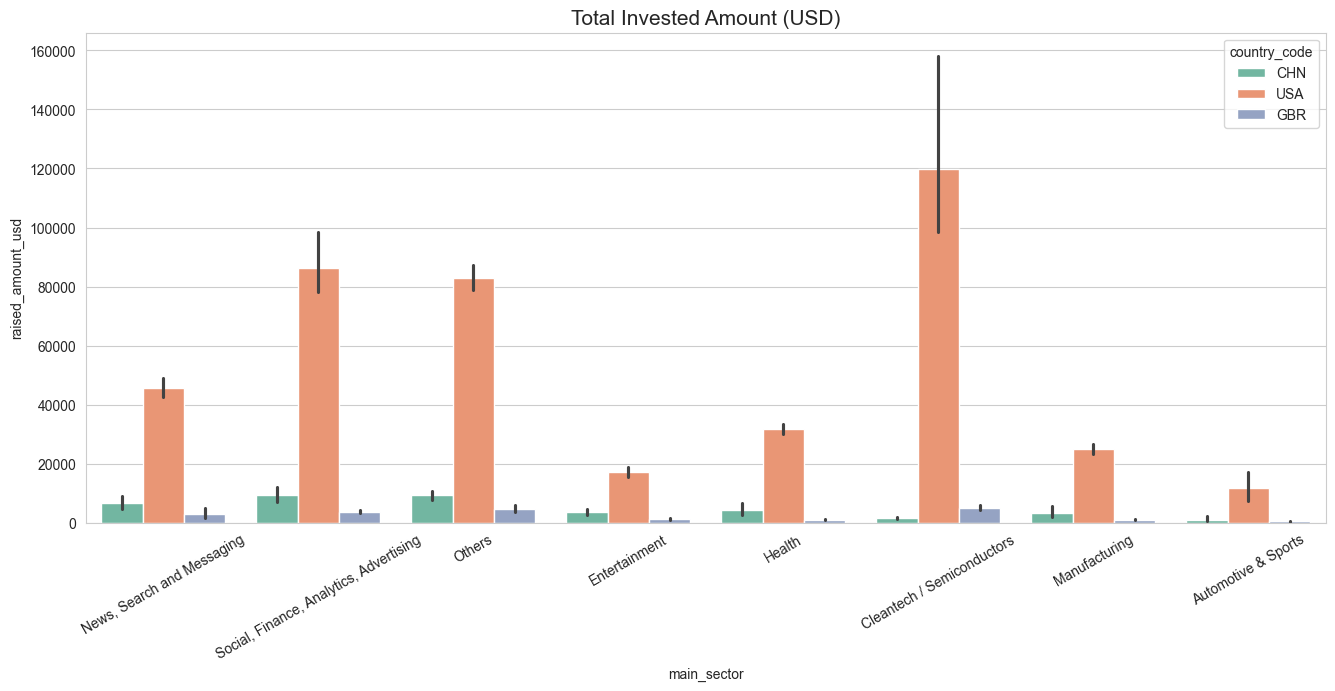

In [66]:
# Vẽ biểu đồ tổng đầu tư theo ngành nghề trong ba quốc gia
plt.figure(figsize=(16, 14))
plt.subplot(2, 1, 1)
p = sns.barplot(x='main_sector', y='raised_amount_usd', hue='country_code', 
                data=master_frame, estimator=np.sum, palette = 'Set2')
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)', size = 15)
plt.show()

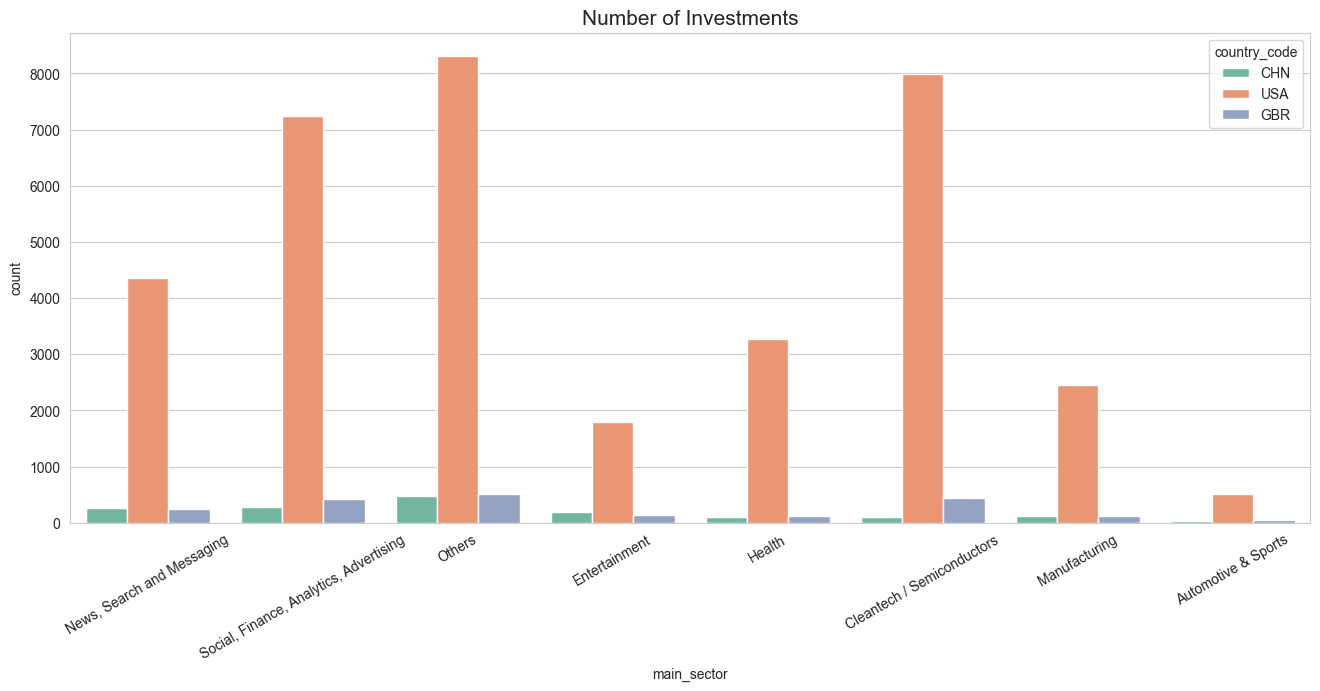

In [67]:
# Vẽ biểu đồ số lượng đầu tư theo ngành nghề trong ba quốc gia
plt.figure(figsize=(16, 14))
plt.subplot(2, 1, 2)
q = sns.countplot(x='main_sector', hue='country_code', data=master_frame, palette = 'Set2')
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments', size = 15)
plt.show()

**Như vậy, quốc gia dẫn đầu về số lượng đầu tư (và tổng số tiền đầu tư) là Mỹ. Các lĩnh vực 'Others', 'Cleantech/Semiconductors' và 'Social, Finance, Analytics, Advertising' là những lĩnh vực được đầu tư nhiều nhất.**

Trong trường hợp không muốn xem 'Others' là một lĩnh vực đầu tư thì 'News, Search and Messaging' là lĩnh vực đầu tư tốt nhất tiếp theo.

# **Kết luận**

Trong bài này, chúng ta đã thực hiện một cuộc nghiên cứu về việc sử dụng Phân Tích Dữ Liệu Khám Phá (EDA) để phân tích mô hình cơ hội đầu tư trên các lĩnh vực khác nhau. Qua các bước phân tích tỉ mỉ và sử dụng các kỹ thuật EDA, chúng ta đã có cái nhìn tổng quan và sâu sắc hơn về cấu trúc và đặc điểm của thị trường, từ đó xác định :
+ Loại hình đầu tư phù hợp nhất với số liệu là loại hình 'Venture' 
+ Quốc gia có số lượng và số tiền đầu tư nhiều nhất là Mỹ, là quốc gia phù hợp để đầu tư nhất dựa trên chiến lược được đưa ra.
+ Những lĩnh vực được đầu tư nhiều nhất phù hợp để phát triển các cơ hội đầu tư tiềm năng đó là các lĩnh vực 'Others', 'Cleantech/Semiconductors' và 'Social, Finance, Analytics and Advertising'